In [241]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd
import math

#Reading data
data = pd.read_csv('data/heart.csv', index_col=0)
# X-->inputs Y-->outputs
X = np.array(data[['trestbps','chol','thalach','oldpeak']])
y = np.array(data['target'])

m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [242]:
def sigmoid( z ):
    return 1 / ( 1 + np.exp( -z ))

In [243]:
def costFunction(theta, X, y):

    m = y.size

    J = -(1/m)* np.sum( y*np.log(sigmoid(np.dot(X,theta))) + (1-y)*np.log(1-sigmoid(np.dot(X,theta))) ) 

    return J
    
def gradiantDescent(alpha , theta , X , y , num_itr):

    m = y.shape[0]
    J_history = []
    theta = theta.copy()

    for i in range(num_itr):
        
        theta -= (alpha / m) * np.dot(X.T, ( sigmoid(np.dot(X,theta)) - y ))

        J_history.append( costFunction(theta, X, y) )
        
    return theta , J_history


In [244]:
def predict(theta, X):

    m = X.shape[0]

    p = np.zeros(m)

    for i in range(m):
        if(sigmoid(np.dot(X[i], theta)) >.5 ):
            p[i] = 1
        else:
            p[i] = 0
            
    return p

In [245]:
intial_theta = np.zeros(X.shape[1])

theta , Jvec = gradiantDescent(0.00006, intial_theta , X , y , 10000)

print('Optimized Theta : ' , theta)

p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Optimized Theta :  [-0.00341731 -0.02658171 -0.00505549  0.03383346 -0.09028929]
Train Accuracy: 71.29 %


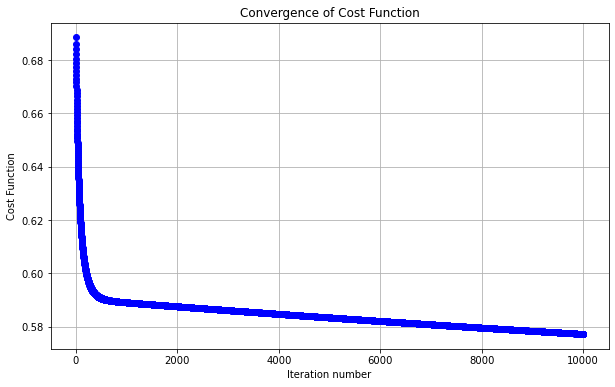

In [246]:
def plotConvergence(Jvec):
    pyplot.figure(figsize=(10,6))
    pyplot.plot( range(len(Jvec)) ,Jvec,'bo')
    pyplot.grid(True)
    pyplot.title("Convergence of Cost Function")
    pyplot.xlabel("Iteration number")
    pyplot.ylabel("Cost Function")

plotConvergence(Jvec)
pyplot.show()